target:",[b'HAM_0003577' b'ISIC_0024307' b'nv' b'follow_up' b'50.0' b'male'
 b'lower extremity' b'vidir_molemax']


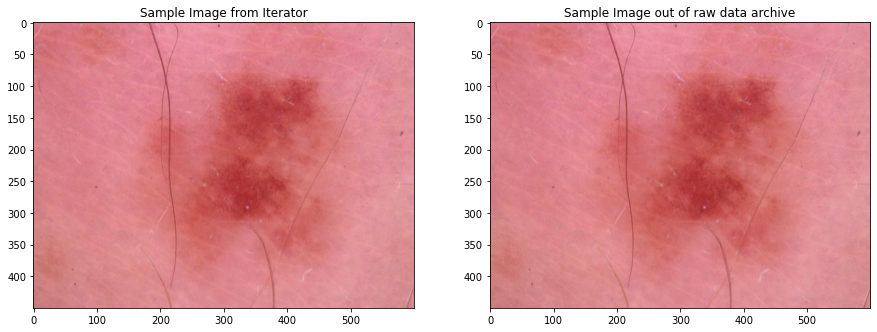

In [27]:
from matplotlib import pyplot as plt
import matplotlib.image as mpimg
from src.outlier_hub.datasets.ham10k.factory import HAMFactory
from data_stack.io.storage_connectors import StorageConnector, FileStorageConnector
import os

# Code for testing the dataset

data_root = os.getcwd()
data_storage_path = os.path.join(data_root, "data")
storage_connector = FileStorageConnector(root_path=data_storage_path)
ham_factory = HAMFactory(storage_connector)
ham_iterator, _ = ham_factory.get_dataset_iterator(config={"split": "raw"})
sample, target, tag = ham_iterator[1]

raw_data_storage_path = os.path.join(data_storage_path, "raw")
raw_img_data_storage_path = os.path.join(raw_data_storage_path, "images")
searched_file = str(target[1])[2:14] + '.jpg'
searched_file_path = os.path.join(raw_img_data_storage_path, searched_file)
img = mpimg.imread(searched_file_path)

print( f'target:",{target}')
f = plt.figure(figsize=(15,15))
f.add_subplot(1,2, 1)
plt.title('Sample Image from Iterator')
plt.imshow(sample)
f.add_subplot(1,2, 2)
plt.title('Sample Image out of raw data archive')
plt.imshow(img)
plt.show()


#print(searched_file_path)

#plt.show()
#src/outlier_hub/datasets/ham10k/data/raw/images